In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
import scipy
import matplotlib.pyplot as plt

In [8]:
# Load Iris data
data = load_iris()
x = data['data']
y = data['target']

In [9]:
# Since PCA is an unsupervised method, we will not be using the targetvariable y
# scale the data such that mean = 0 and standard deviation = 1
x_s = scale(x, with_mean=True, with_std=True, axis=0)

#calculate correlation matrix
x_c = np.corrcoef(x_s.T)

# Find eigen value and eigen vector from correlation matrix
eig_val, r_eig_vec = scipy.linalg.eig(x_c)
print("Eigen values \n%s"%(eig_val))
print("\nEigen values \n%s"%(eig_vec))

Eigen values 
[2.91849782+0.j 0.91403047+0.j 0.14675688+0.j 0.02071484+0.j]

Eigen values 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Text(0, 0.5, 'Component 2')

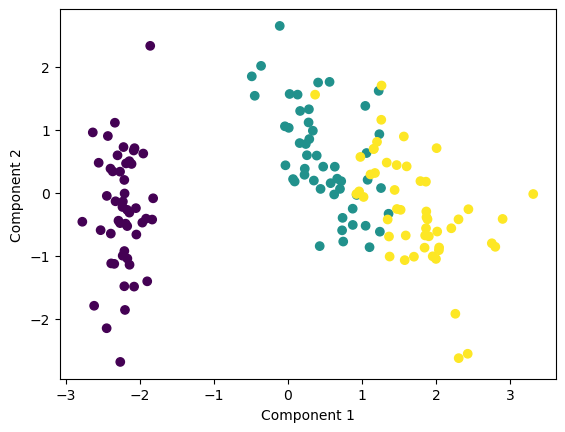

In [10]:
#Select the first two eigen vectors.
w = r_eig_vec[:,0:2]

# # Project the dataset in to the dimension
# from 4 dimension to 2 using the right eignen vector
x_rd = x_s.dot(w)
plt.figure(1)
plt.scatter(x_rd[:,0], x_rd[:,1], c=y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")

In [12]:
cum_per = 0
per_var = 0
for i,e_val in enumerate(eig_val):
    per_var = round((e_val / len(eig_val)),3)
    cum_per+=per_var
print(('%d, %0.2f, %0.2f, %0.2f')%(i+1, e_val, per_var*100,cum_per*100))

4, 0.02, 0.50, 100.10


/tmp/ipykernel_11126/1370159776.py:4: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  per_var = round((e_val / len(eig_val)),3)
/tmp/ipykernel_11126/1370159776.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  print(('%d, %0.2f, %0.2f, %0.2f')%(i+1, e_val, per_var*100,cum_per*100))
